In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn import tree


In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\avani\Downloads\Iris (1).csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:

# Split the dataset into features (X) and target (y)
X = data.drop('Species', axis=1)
y = data['Species']



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [10]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print('Training Score',train_score)  # Training Accuracy
    print('Testing Score',test_score)    # Testing Accuracy

In [11]:
dt1= DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=15)
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=15)

In [12]:
mscore(dt1)

Training Score 1.0
Testing Score 0.9736842105263158


In [13]:
ypred_dt1 = dt1.predict(X_test)
print(ypred_dt1)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


In [14]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9736842105263158
Confusion Matrix
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [15]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [16]:
# cn = class names, fn = feature_names 
cn = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fn = X_train.columns
print(fn)
print(cn)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


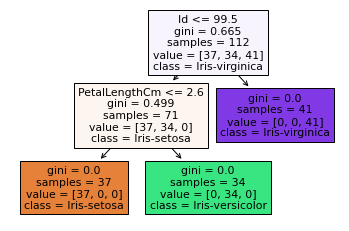

In [17]:
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [18]:
#Decision tree 2 (For Viz)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15
                            
                            
                            )
dt2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

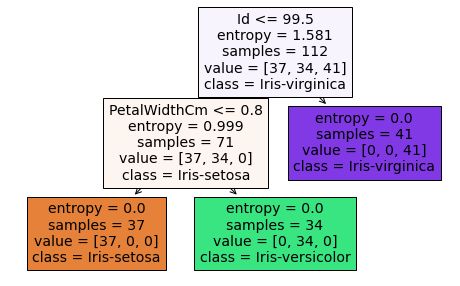

In [21]:
plt.figure(figsize=(8,5))
plot_tree(dt2,feature_names=fn,class_names=cn,filled=True)
plt.show()

In [22]:
mscore(dt2)

Training Score 1.0
Testing Score 0.9736842105263158


In [23]:
ypred_dt2 = dt2.predict(X_test)
print(ypred_dt2)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


In [24]:
eval_model(y_test,ypred_dt2)

Accuracy_Score 0.9736842105263158
Confusion Matrix
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

